In [1]:
import h5py
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

cat


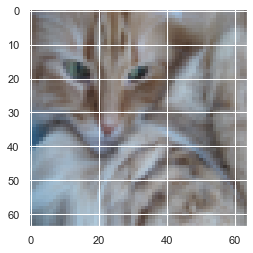

In [4]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

plt.imshow(train_set_x_orig[2])
print(classes[np.squeeze(train_set_y[:,25])].decode('utf8'))

In [6]:
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]

print('Number of training examples: m_train = '+ str(m_train))
print('Number of testing examples: m_test = '+ str(m_test))
print('Height/Width of each image: num_px = '+ str(num_px))
print('Each image if of size: ('+ str(num_px) + ', ' + str(num_px) + ', 3')
print('train_set_x shape: '+ str(train_set_x_orig.shape))
print('train_set_y shape: '+ str(train_set_y.shape))
print('test_set_x shape: '+ str(test_set_x_orig.shape))
print('test_set_y shape: '+ str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image if of size: (64, 64, 3
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [7]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print('train_set_x_flatten shape: ' + str(train_set_x_flatten.shape))
print('train_set_y shape: ' + str(train_set_y.shape))
print('test_set_x_flatten shape: ' + str(test_set_x_flatten.shape))
print('test_set_y shape: ' + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [8]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [9]:
def sigmoid(z):
    s = 1/(1 + np.exp(-z))
    return s

In [10]:
def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [11]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    #forward propagation
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1/m) * np.sum(Y*np.log(A) + (1-Y) * (np.log(1-A)))
    
    #backward propagation
    dw = (1/m) * np.dot(X, (A-Y).T)
    db = (1/m * np.sum(A-Y))
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw': dw, 'db': db}
    
    return grads, cost

In [12]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    
    costs = []
    
    for i in range(num_iterations):
        
        #cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        #get derivatives
        dw = grads['dw']
        db = grads['db']
        
        #update rule
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        #record costs
        if i % 100 == 0:
            costs.append(cost)
            
        #print cost every 100 training examples
        if print_cost and i % 100 == 0:
            print('Cost after iteration %i: %f' % (i, cost))
            
    params = {'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}
    
    return params, grads, costs

In [13]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    #compute probability vector
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [14]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    #Initialize parameters with 0s
    w, b = initialize_with_zeros(X_train.shape[0])
    
    #Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    #Retrive parameters w, b from dictionary
    w = parameters['w']
    b = parameters['b']
    
    #Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    #Print test/train errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {'costs': costs,
         'Y_prediction_test': Y_prediction_test,
         'Y_prediction_train': Y_prediction_train,
         'w': w,
         'b': b,
         'learning_rate': learning_rate,
         'num_iterations': num_iterations}
    
    return d

In [15]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


Text(0, 0.5, 'cost')

Text(0.5, 0, 'iterations (per hundreds)')

Text(0.5, 1.0, 'Learning rate = 0.005')

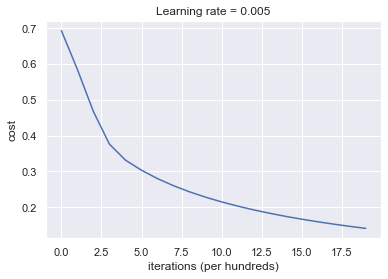

In [16]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Learning rate = ' + str(d['learning_rate']))
plt.show()